In [1]:
pip install transformers datasets torch


# Importing Libraries

In [2]:
import torch
from transformers import ElectraTokenizer, ElectraModel
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# 1. Loading ELECTRA tokenizer and model

In [3]:
model_name = "google/electra-small-discriminator"
tokenizer = ElectraTokenizer.from_pretrained(model_name)
model = ElectraModel.from_pretrained(model_name)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


# 2. Taking Input for Two Sentences:

In [4]:
# Enter Input sentences here
sentence1 = input("Enter first sentence: ")
sentence2 = input("Enter second sentence: ")

sentences = [sentence1, sentence2]


Enter first sentence: The bank will not approve the loan.
Enter second sentence: He sat on the bank of the river.


# 3. Tokenization & Embedding Generation:


In [5]:
input_1 = tokenizer(sentences[0], return_tensors="pt")
input_2 = tokenizer(sentences[1], return_tensors="pt")

with torch.no_grad():
    output_1 = model(**input_1)
    output_2 = model(**input_2)


# 4. Extracting Token Embeddings & Converting to NumPy:


In [6]:
contx_embd_1 = output_1.last_hidden_state.squeeze(0)
contx_embd_2 = output_2.last_hidden_state.squeeze(0)

embd_1 = contx_embd_1.numpy()
embd_2 = contx_embd_2.numpy()


# 5. Dimensionality Reduction using t-SNE:

In [7]:
# converting higher dimension to 2D using t-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=5)
embd_2d_1 = tsne.fit_transform(embd_1)
embd_2d_2 = tsne.fit_transform(embd_2)

tokens_1 = tokenizer.convert_ids_to_tokens(input_1["input_ids"].squeeze(0))
tokens_2 = tokenizer.convert_ids_to_tokens(input_2["input_ids"].squeeze(0))


# 6. Plotting & Visualization:

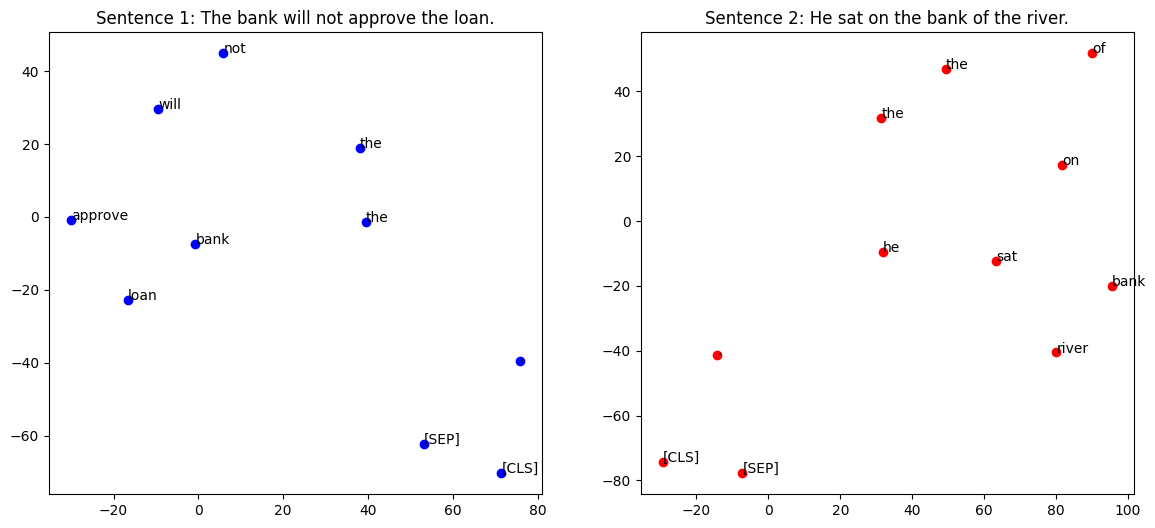

In [8]:
# Graph visualization
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot for sentence 1
axes[0].scatter(embd_2d_1[:, 0], embd_2d_1[:, 1], c='blue')
for i, token in enumerate(tokens_1):
    axes[0].annotate(token, (embd_2d_1[i, 0], embd_2d_1[i, 1]))
axes[0].set_title(f"Sentence 1: {sentence1}")

# Plot for sentence 2
axes[1].scatter(embd_2d_2[:, 0], embd_2d_2[:, 1], c='red')
for i, token in enumerate(tokens_2):
    axes[1].annotate(token, (embd_2d_2[i, 0], embd_2d_2[i, 1]))
axes[1].set_title(f"Sentence 2: {sentence2}")

plt.show()

## Part: 2

# Importing Libraries

In [9]:
import torch
import time
from transformers import BertModel, BertTokenizer, ElectraModel, ElectraTokenizer
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# 1. Loading Models and Tokenizers:


In [10]:
# Paragraph for testing
paragraph = """Financial markets have been highly volatile this year. Major banks are adjusting their interest rates
in response to economic uncertainties. Investors are looking for safe havens like gold and government bonds.
Meanwhile, technology companies continue to innovate, launching new products that drive market enthusiasm.
Despite challenges, the financial sector remains resilient, adapting to changing conditions with strategic planning
and technological advancements."""

# BERT-base Model and tokenizer
bert_tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
bert_model = BertModel.from_pretrained("bert-base-uncased")

# ELECTRA-small Model and tokenizer
electra_tokenizer = ElectraTokenizer.from_pretrained("google/electra-small-discriminator")
electra_model = ElectraModel.from_pretrained("google/electra-small-discriminator")

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

# 2. Checking Device Availability:




In [11]:
# Move models to GPU for faster process
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
bert_model.to(device)
electra_model.to(device)

ElectraModel(
  (embeddings): ElectraEmbeddings(
    (word_embeddings): Embedding(30522, 128, padding_idx=0)
    (position_embeddings): Embedding(512, 128)
    (token_type_embeddings): Embedding(2, 128)
    (LayerNorm): LayerNorm((128,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (embeddings_project): Linear(in_features=128, out_features=256, bias=True)
  (encoder): ElectraEncoder(
    (layer): ModuleList(
      (0-11): 12 x ElectraLayer(
        (attention): ElectraAttention(
          (self): ElectraSelfAttention(
            (query): Linear(in_features=256, out_features=256, bias=True)
            (key): Linear(in_features=256, out_features=256, bias=True)
            (value): Linear(in_features=256, out_features=256, bias=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (output): ElectraSelfOutput(
            (dense): Linear(in_features=256, out_features=256, bias=True)
            (LayerNorm): LayerNorm((

# 3. Generating Embeddings and Measuring Time:

In [12]:
# function for embeddings and time measuremnet so that i can use for both models
def embedding(model, tokenizer, text):
    ip = tokenizer(text, return_tensors="pt", truncation=True, padding=True).to(device)
    start_time = time.time()
    with torch.no_grad():
        output = model(**ip)
    end_time = time.time()
    embedding_time = end_time - start_time
    embeddings = output.last_hidden_state.squeeze(0).cpu().numpy()
    tokens = tokenizer.convert_ids_to_tokens(ip["input_ids"].squeeze(0))
    return embeddings, embedding_time, tokens

# embeddings and time for BERT-Base
bert_embd, bert_time, bert_tokens = embedding(bert_model, bert_tokenizer, paragraph)

# embeddings and time for ELECTRA-Small
electra_embd, electra_time, electra_tokens = embedding(electra_model, electra_tokenizer, paragraph)

# Print Time Taken
print(f"BERT-Base Time: {bert_time:.4f} seconds")
print(f"ELECTRA-Small Time: {electra_time:.4f} seconds")


BERT-Base Time: 1.4768 seconds
ELECTRA-Small Time: 0.2584 seconds


# 4. Dimensionality Reduction & Visualization:


In [13]:
# Reduce dimensions to 2D using t-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=35)
bert_embd_2d = tsne.fit_transform(bert_embd)
electra_embd_2d = tsne.fit_transform(electra_embd)



# 5. Plotting Results:

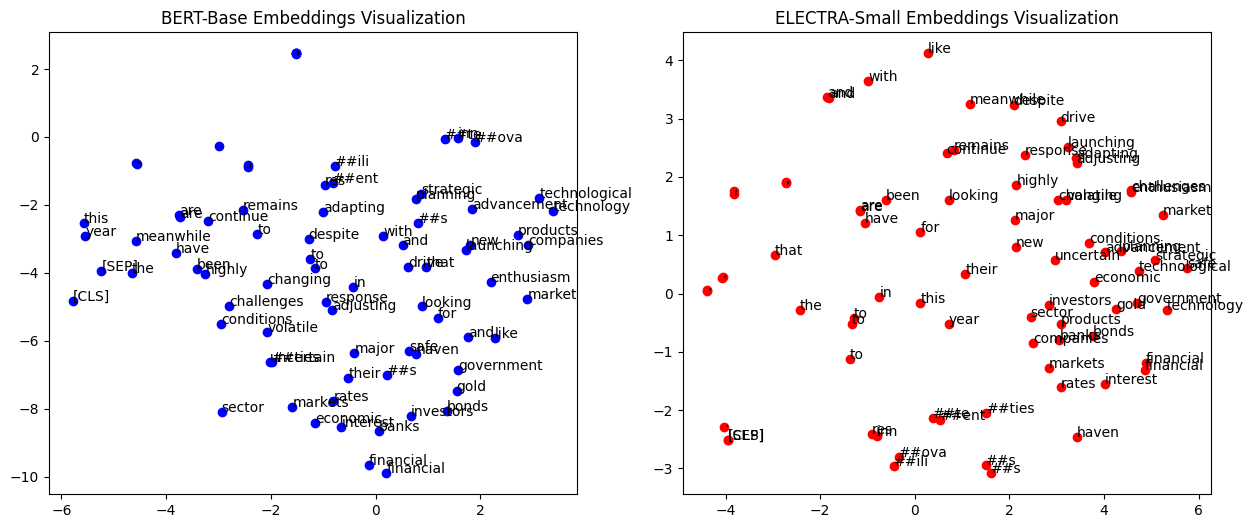

In [14]:
# Plotation of embeddings
plt.figure(figsize=(15, 6))

# BERT Plot
plt.subplot(1, 2, 1)
plt.scatter(bert_embd_2d[:, 0], bert_embd_2d[:, 1], c='blue')
for i, token in enumerate(bert_tokens):
    plt.annotate(token, (bert_embd_2d[i, 0], bert_embd_2d[i, 1]))
plt.title("BERT-Base Embeddings Visualization")

# ELECTRA Plot
plt.subplot(1, 2, 2)
plt.scatter(electra_embd_2d[:, 0], electra_embd_2d[:, 1], c='red')
for i, token in enumerate(electra_tokens):
    plt.annotate(token, (electra_embd_2d[i, 0], electra_embd_2d[i, 1]))
plt.title("ELECTRA-Small Embeddings Visualization")

plt.show()